<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/Vyimov-Zorislav-folder/Vyimov%20Zorislav/ZorislavVyymov_Internship_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Блокнот по Стажировке по задаче "Оценка кадидатов по резюме".**

## Текущие непонятки

### **По задаче Заказчика**

#### Ранее снятые вопросы

1. Верно ли: НС должна угадывать предпочтения Заказчика к соискателям по совокупности данных в тех резюме, которые он пометил как "Да" (подходит)? Применимо ко всем позициям (должностям) соискателей в датасете? 

Ответ: да

2. По ТЗ требуется оценить степень приемлемости кандидатов для компании, но разве для этого эта степень не должна входить в разметку датасета? Сейчас ее нет - откуда брать? Или эта степень будет выражаться вероятностью результата «подходит»?

Ответ: Нет, не должна. Да, степенью вероятности ответа да /нет

#### Оставшиеся вопросы

1. Какова гарантия того, что Заказчик не изменит свои критерии оценки резюме со временем: при разметке руководствовался одними, при оценке нейронке и подготовки тестовых данных  - другими?  Не правильнее сразу выделить тестовые данные из размеченных Заказчиком (как только получим их) и сохранить их для оценки по готовности НС?

2. Пока не очень ясно, как обеспечить дообучаемость модели. Видимо, с заказчиком необходимо оговорить формат поставляемых им новых данных в будущем, с тем, чтобы автоматически производить их предобработку для подачи в НС с уже используемыми данными. Соответственно, стоит сразу выстраивать автопредобработку данных, применяемой к новым данным. Текущий дататсет можно взять за основу, если только Заказчик не намерен его изменить в будущем. Или получить от заказчика форму датасета в будущем. Если у заказчика нет какого то внятного видения этого будущего представления, возможно лучшим вариантом было бы предложить ему ту форму, которую он обязуется соблюдать при подготовке новых данных и которая максимально соответствовала бы решению задачи. Тогда автопредобработку надо выстраивать именно этого формата.

3. Верно ли, что те резюме, которые Заказчик никак не разметил (Поле "Подходит да/нет") никак нельзя использовать в обучении и их придется просто удалить из дататсета?

### **По ходу решения**




#### Ранее решенные 

1. ошибка при сборке вектора из обработанных данных с помощью отдельных функций для каждого поля 

Решено: выявлена неверная индексация столбцов названиями полей для использования в коде. Исправлено

#### Не решенные

пока нет

## Сборник необходимых для работы библиотек.

In [2]:
# импортируем keras
from tensorflow import keras
from tensorflow.keras import layers

# Работа с массивами данных
import numpy as np 

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Для подключения Гугл-диска
from google.colab import drive

# Работа со временем
import time

# Чтоб рисовать в колабе:
%matplotlib inline

from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #

#from google.colab import files #  Для загрузки своей картинки

import random #Для генерации случайных чисел 
import math # Для округления

# Запись в файлы и чтение из файлов структур данных Python
# import pickle

#import os #Для работы с файлами 

# Регулярные выражения
import re 

from IPython.display import clear_output

## Исходные данные. Анализ

### Исследование Датасета

Скачаем базу для работы:

In [ ]:
# Чтение файла базы данных из сохраненного как CSV файла:
df = pd.read_csv('DataSet.csv', error_bad_lines=False)

# Вывод количества резюме и числа признаков
print(df.shape)

df.head()

Очень много потерянных при загрузке данных, если использовать этот способ загрузки. В данных - каша. Исправлять вручную - не вариант. Использую загрузку оригинального файла в формате .xlsx

---



In [ ]:
# Загрузим как файл .xlsx
data = pd.read_excel('ДатаСет Оценка резюме 581 резюме.xlsx')
data

,Unnamed: 0,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,577,2023-02-28 00:00:00,Логинов Николай Сергеевич,"Мужчина, 24 года, родился 16 мая 1998",70 000 руб.,Project manager,"Москва, м. Китай-город, Уфа, готов к редким ко...",полная занятость,полный день,Опыт работы —3 года 1 месяц,"Алабуга, ОЭЗ ППТ",HR-специалист,"Высшее, 2020, Казанский (Приволжский) федераль...",27 февраля 2023 в 21:27,NaN
575,578,2023-02-17 00:00:00,Шапошников Артём Александрович,"Мужчина, 42 года, родился 27 марта 1980",100 000 руб.,Project manager,"Уфа, Не готов к переезду, готов к командировкам",полная занятость,"удаленная работа, полный день",Опыт работы —12 лет 8 месяцев,Dental Hall,Директор по развитию и связи с общественностью,"Среднее специальное, 2002, УФЭК, 2000, УКСиВТ",15 февраля 2023 в 09:17,NaN
576,579,2023-02-12 00:00:00,Якупов Айрат Юлаевич,"Мужчина, 39 лет, родился 19 октября 1983",80 000 руб.,Project manager,"Уфа, Готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —17 лет,"ООО ""Линзы Хойя Рус""","Территориальный менеджер (Уфа, Пермь, Ижевск, ...","Высшее, 2005, Стерлитамакская государственная ...",6 июля 2022 в 15:05,NaN
577,580,2023-01-24 00:00:00,Петрова Лилия Авгатовна,"Женщина, 38 лет, родилась 14 июля 1984",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готова к переезду, готова к редким ком...",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —15 лет 9 месяцев,ОАО ФАРМСТАНДАРТ-УФАВИТА,Ведущий экономист,"Высшее, 2006, уфимский технологический институ...",30 января 2023 в 11:56,NaN


Данные загружены и по нумерации строк видно, что фактически данных меньше: в XLS легко определить, что нет строк 541-543. 
Посмотрим на данные, с которыми нам предстоит работать:

In [ ]:
# Вывод количества резюме и числа признаков
print(data.shape)

data.head(3)

(579, 15)


,Unnamed: 0,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       579 non-null    int64 
 1   Дата отклика                     579 non-null    object
 2   ФИО                              579 non-null    object
 3   Пол, возраст                     579 non-null    object
 4   ЗП                               579 non-null    object
 5   Ищет работу на должность         579 non-null    object
 6   Город                            579 non-null    object
 7   Занятость                        579 non-null    object
 8   График                           579 non-null    object
 9   Опыт ()                          579 non-null    object
 10  Последнее/нынешное место работы  579 non-null    object
 11  Последняя/нынешняя должность     579 non-null    object
 12  Образование и ВУЗ                579

Выводы: 
1. Целевой столбец не содержит данных для 79 записей.  Это вопрос к заказчику (их предоставление)
2. К удалению из ДФ как бесполезные данные для обучения: столбцы 0,1,2,10,13
3. Кажется целесообразным разбить данные S3 на отдельные признаки: "Пол" и "Возраст"
4. Кажется целесообразным разбить данные S12 на отдельные признаки "Образование" и "ВУЗ"

In [ ]:
# посмотрим на единственный цифровой столбец S0:
data.describe()

,Unnamed: 0
count,579.000000
mean,289.196891
std,167.607444
min,0.000000
25%,144.500000
50%,289.000000
75%,433.500000
max,581.000000


Сквозная нумерация строк отличается от нумерации в поле S0. Не хватает 3 строк. Предлагаю удалить этот столбец из DF data

In [ ]:
data.describe(include=['O'])

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
count,579,579,579,579,579,579,579,579,579,579,579,579,579,500
unique,89,507,443,44,8,209,20,30,252,486,358,488,547,2
top,2023-02-22 00:00:00,ФИО скрыто соискателем,Женщина,не указана,Growth Product Manager,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —6 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product manager,Среднее образование,31 января 2023 в 09:52,нет
freq,48,7,41,288,198,69,342,202,10,12,42,15,3,489


In [ ]:
# посмотрим на столбец "Пол, возраст"
data["Пол, возраст"].value_counts()


Женщина                                       41
Мужчина                                       35
Женщина, 37 лет, родилась 3 января 1986        4
Мужчина, 28 лет, родился 16 августа 1994       4
Мужчина, 21 год, родился 8 марта 2001          3
                                              ..
Женщина, 26 лет, родилась 25 сентября 1996     1
Женщина, 22 года, родилась 17 июля 2000        1
Мужчина, 26 лет, родился 18 апреля 1996        1
Женщина, 27 лет, родилась 11 декабря 1995      1
Женщина, 29 лет, родилась 21 марта 1993        1
Name: Пол, возраст, Length: 443, dtype: int64

выводы: 
1. пол соискателя - обычно значимая информация для работодателя. нужно выводить в самостоятельный атрибут.
2. возраст соискателя - обычно значимая информация для работодателя, но в данном ДС она неполна для 76 записей. Нужно попытаться выделить ее в самостоятельный атрибут (int) и категоризировать, согласовать с Заказчиком категории. В отношении пустых значений предлагаемого нового атрибута "возраст" предлагаю заместить значением "нет данных". При категоризации это значение приравнять к 0, включив его, таким образом в первую категорию (0-17 лет)
3. дата рождения соискателя -  обычно не значимая при подборе информация и в данном случае не поможет восполнить недостающие значения атрибута "возраст". Но при устаревшем ДС она может дать более корректные знасения возраста (текущий год минус год рождения). К тому же, проще парсить четыре подряд идущих числовых символа - наверняка год. Дата и месяц рождения не интересны. По согласованию с Заказчиком предлагаю игнорить эти данные при обучении. Использовать только возраст.

In [ ]:
# Доля пустых значений в полях:
data.isna().sum() / data.shape[0]

Unnamed: 0                         0.000000
Дата отклика                       0.000000
ФИО                                0.000000
Пол, возраст                       0.000000
ЗП                                 0.000000
Ищет работу на должность           0.000000
Город                              0.000000
Занятость                          0.000000
График                             0.000000
Опыт ()                            0.000000
Последнее/нынешное место работы    0.000000
Последняя/нынешняя должность       0.000000
Образование и ВУЗ                  0.000000
Обновление резюме                  0.000000
Подходит - да/нет                  0.136442
dtype: float64

Новой информации это не дало. Разметка Датасета (заполненение подходит/не подходит) является обязательством заказчика - эти данные надо истребовать и перевести в булеву величину.



In [ ]:
# посмотрим на столбец "ЗП"
data["ЗП"].value_counts()

не указана       288
50 000 руб.       27
100 000 руб.      24
70 000 руб.       24
40 000 руб.       23
150 000 руб.      21
60 000 руб.       21
30 000 руб.       20
35 000 руб.       19
80 000 руб.       18
120 000 руб.      15
200 000 руб.       8
45 000 руб.        8
90 000 руб.        7
75 000 руб         5
180 000 руб.       4
110 000 руб.       4
95 000 руб.        3
55 000 руб.        3
85 000 руб.        3
20 000 руб.        3
65 000 руб.        2
1 550 USD          2
130 000 руб.       2
280 000 руб.       2
250 000 руб.       2
1 руб.             2
25 000 руб.        2
2 000 USD          2
100 000 KGS        1
155 000 руб.       1
170 000 руб.       1
3 500 USD          1
600 000 KZT        1
160 000 руб.       1
127 000 руб.       1
119 000 руб.       1
350 000 руб.       1
4 000 USD          1
2 500 USD          1
1 200 EUR          1
1 900 000 KZT      1
140 000 руб.       1
3 000 USD          1
Name: ЗП, dtype: int64

In [ ]:
data["ЗП"].unique()

array(['90 000 руб.', 'не указана', '150 000 руб.', '120 000 руб.',
       '100 000 руб.', '30 000 руб.', '40 000 руб.', '70 000 руб.',
       '50 000 руб.', '140 000 руб.', '130 000 руб.', '80 000 руб.',
       '65 000 руб.', '95 000 руб.', '45 000 руб.', '60 000 руб.',
       '200 000 руб.', '1 900 000 KZT', '1 руб.', '250 000 руб.',
       '280 000 руб.', '110 000 руб.', '600 000 KZT', '1 550 USD',
       '1 200 EUR', '2 500 USD', '85 000 руб.', '4 000 USD',
       '350 000 руб.', '119 000 руб.', '180 000 руб.', '127 000 руб.',
       '160 000 руб.', '2 000 USD', '3 500 USD', '75 000 руб',
       '170 000 руб.', '155 000 руб.', '55 000 руб.', '35 000 руб.',
       '20 000 руб.', '25 000 руб.', '100 000 KGS', '3 000 USD'],
      dtype=object)

Предложения:
1. перевести к единой валюту (руб) и только в числовые значения
2. Значения "1 руб" пусть преобразуется в 1 
3. не указана преобразовать в число 0
4. категорировать значения по согласованию с Заказчиком.

In [ ]:
data["Город"].value_counts()

Уфа, Не готова к переезду, не готова к командировкам                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              69
Уфа, Не готова к переезду, готова к редким командировкам                                           

Выводы:
1. предлагаю выделить в три отдельных атрибута:
 - до первой запятой: текстовый "Город"  и затем категоризировать: (город работодателя (Москва), Миллионники, Зарубеж, остальные)
 - от первой до посдедней запятой: булево "готов к переезду", где 1 принадлежит вариациям "готов к переезду" без конкретики ИЛИ
   "готов к переезду" + город/страна Работодателя;  0 == все остальное
 - после последней запятой: 3 категории "готов к командировкам": (нет, редкие, да)

In [ ]:
# рассмотрим содержимое колонки соискателя должности
data["Ищет работу на должность"].unique()

array(['Growth Product Manager',
       'Product manager в Growth Hacking команду',
       'Директор медицинской клиники', 'HR-специалист',
       'Product Manager в команду Финансового департамента',
       'Product Manager в команду HR', 'Project manager',
       'Product Marketing Manager в Growth Hacking команду'], dtype=object)

Вывод: не более 8 вариантов. Категоризировать.

In [ ]:
# рассмотрим содержимое колонки "Занятость"
data["Занятость"].unique()

array(['проектная работа, частичная занятость, полная занятость',
       'полная занятость',
       'стажировка, частичная занятость, полная занятость',
       'полная занятость, частичная занятость, проектная работа',
       'проектная работа, полная занятость',
       'проектная работа, стажировка, волонтерство, частичная занятость, полная занятость',
       'проектная работа, стажировка, частичная занятость, полная занятость',
       'частичная занятость, полная занятость',
       'проектная работа, стажировка, полная занятость',
       'стажировка, полная занятость', 'частичная занятость',
       'проектная работа, неполный рабочий день, полный рабочий день',
       'проектная работа, частичная занятость',
       'полная занятость, частичная занятость, проектная работа, стажировка',
       'проектная работа, волонтерство, частичная занятость, полная занятость',
       'полная занятость, проектная работа',
       'полная занятость, частичная занятость',
       'полная занятость, час

Вывод: 
1. по согласованию с заказчиком исключить вариант "волонтерство", если он ему не интересен/оставить
2. неполный рабочий день == неполная занятость
3. полный рабочий день == полная занятость
4. ввести 4-5 категорий


In [ ]:
# рассмотрим содержимое колонки "График"
data["График"].unique()

array(['удаленная работа', 'удаленная работа, гибкий график, полный день',
       'полный день, гибкий график', 'полный день',
       'удаленная работа, полный день',
       'удаленная работа, гибкий график, полный день, сменный график',
       'вахтовый метод, удаленная работа, гибкий график, полный день, сменный график',
       'удаленная работа, полный день, сменный график',
       'полный день, сменный график', 'удаленная работа, гибкий график',
       'удаленная работа, полный рабочий день',
       'полный день, удаленная работа',
       'полный день, сменный график, гибкий график, удаленная работа',
       'полный день, сменный график, гибкий график, удаленная ',
       'удаленная работа, вахтовый метод',
       'полный день, сменный график, гибкий график',
       'полный день, гибкий график, удаленная работа',
       'полный день, сменный график, гибкий график, вахтовый метод',
       'полный день, гибкий график, удаленная работа, вахтовый метод',
       'полный день, сменный гр

Выводы:
Привести к категориям: вахта, смена, гибкий, полный, удаленка

In [ ]:
# рассмотрим содержимое колонки "Опыт"
data["Опыт ()"].unique()

array(['Опыт работы —5 лет 10 месяцев', 'Опыт работы —11 лет 11 месяцев',
       'Опыт работы —7 лет 2 месяца', 'Опыт работы —8 лет 10 месяцев',
       'Опыт работы —5 лет 9 месяцев', 'Опыт работы —5 лет 11 месяцев',
       'Опыт работы —13 лет 9 месяцев', 'Опыт работы —5 лет',
       'Опыт работы —10 лет 3 месяца', 'Опыт работы —4 года 4 месяца',
       'Опыт работы —13 лет 7 месяцев', 'Опыт работы —5 лет 1 месяц',
       'Опыт работы —16 лет 3 месяца', 'Опыт работы —19 лет 4 месяца',
       'Опыт работы —34 года 6 месяцев', 'Опыт работы —17 лет 6 месяцев',
       'Опыт работы —5 лет 7 месяцев', 'Опыт работы —22 года 3 месяца',
       'Опыт работы —31 год 8 месяцев', 'Опыт работы —23 года 8 месяцев',
       'Опыт работы —12 лет 8 месяцев', 'Опыт работы —23 года 5 месяцев',
       'Опыт работы —24 года 6 месяцев', 'Опыт работы —15 лет 11 месяцев',
       'Опыт работы —13 лет 5 месяцев', 'Опыт работы —19 лет 3 месяца',
       'Опыт работы —20 лет 3 месяца', 'Опыт работы —7 лет 10 месяце

Вывод:
1. на самом деле это  -  общий трудовой стаж соискателя
2. преобразовать к количеству мес (int)
3. Категоризировать. Категории согласовать с Заказчиком

In [ ]:
# рассмотрим содержимое колонки "Последняя/нынешняя должность"
data["Последняя/нынешняя должность"].unique()

array(['Менеджер по продукту',
       'Product owner трайб сбережения и инвестиции',
       'Директор по маркетингу и бренд-менеджер',
       'Product Manager (team leader)', 'Product/Project manager',
       'Начальник участка инъекционных препаратов', 'Контент-менеджер',
       'Учитель русского языка и литературы', 'Специалист',
       'Ведущий бизнес аналитик', 'Супервайзер отдела продаж',
       'Начальник отдела сопровождения Договоров', 'Бухгалтер',
       'Заместитель начальника управления по налоговому учету и отчетности',
       'Руководитель планово-экономического отдела',
       'Управляющий отделом персонала', 'Финансовый менеджер',
       'Контент-менеджер, продьюсер', 'Начальник отдела казначейства',
       'Главный\xa0 бухгалтер', 'Главный бухгалтер',
       'Финансовый руководитель', 'Главный экономист',
       'Финансовый директор\xa0',
       'Бухгалтер по расчету заработной платы и сдаче отчетности',
       'Агент по туризму', 'Руководитель инвестиционного отдела',


In [ ]:
data["Последняя/нынешняя должность"].nunique()

358

Вывод: почти нет повторений в этом атрибуте. Пока неясно что с этим можно сделать. 

In [ ]:
data["Подходит - да/нет"].unique()

array(['да', 'нет', nan], dtype=object)

In [ ]:
data["Подходит - да/нет"].value_counts()

нет    489
да      11
Name: Подходит - да/нет, dtype: int64

Вывод: очень несбалансированный датасет

### Общий вывод и предложения по датасету

Этот дататсет какой то нерабочий. Только 11 подходящих Заказчику резюме из 571 вариантов, 79 из которых вообще не определены ни в какую из категорий. 
Всего в данном Дататсете рассматривается 8 должностей, из которых Заказчик пометил как "да" только 4 варианта.

Приобразовывать имено этот Дататсет и готовить его для обучения кажется нет смысла, тем более что анонсирован другой Датасет. Целесообразно дождаться его, возможно он будет иного формата/содержанияи и качества разметки. 

С этим же можно пока потренироваться в обработке, прикинуть что обсудить с Заказчиком.

0. **Индекс**               удалить
1. **Дата отклика**         удалить
2. **ФИО**                  удалить
3. **Пол, возраст**         разделить Пол (булево) и Возраст (кат)
4. **ЗП**                   привести к единой валюте в млн руб, ОНЕ (11)
5. **Ищет работу на должность** ОНЕ (8)  
6. **Город**                OHE (4)
6.1. Готовность к переезду  булево, к "да" отнести "хочу" и "Готов" без конкретики или если указан город/страна Заказчика
6.2. Готовность к командировкам (OHE): да, нет , редко
7. **Занятость**            кат (4/5)
8. **График**               кат (5) 
9. **Опыт**                 привести к мес (int), (кат)
10. **Последнее/нынешное место работы**   удалить
11. **Последняя/нынешняя должность**      удалить
12. **Образование и ВУЗ**   выделить: Образование  (кат)
12.1. ВУЗ (STR)
13. **Обновление резюме**   удалить
14. **Подходит**            кат(2)






## Подготовка исходных данных для обучения.

In [3]:
# Загрузка исходного файла.xlsx
data = pd.read_excel('ДатаСет Оценка резюме 581 резюме_нов.xlsx')

### Парсинг Датасета

!!! Здесь пока сборник инструментов, их надо адаптировать к Задаче !!!

#### Готовые (адаптипованы к датасету)

In [4]:
#Убрать лишние столбцы

fixed_df = data.drop(data.columns[0],axis = 1)         # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с датой отклика. Он нам не нужен
fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с ФИО. Он нам не нужен
# Вывод количества резюме и числа оставшихся признаков
print(fixed_df.shape)

fixed_df.head(3)


(23, 12)


,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,"Мужчина, 36 лет, родился 22 октября 1986",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —13 лет 7 месяцев,"ООО ""Уральская мясная компания""",Ведущий бизнес аналитик,"Высшее, 2009, Стерлитамакская государственная ...",19 января 2023 в 17:09,нет
2,"Мужчина, 28 лет, родился 18 октября 1994",70 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —5 лет 1 месяц,Ростелеком,Супервайзер отдела продаж,"Высшее, 2016, Башкирский государственный аграр...",31 января 2023 в 09:52,нет


In [5]:
# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(12):  # Для каждого из столбцов таблицы (их теперь 12)
    for i in range(fixed_df.shape[0]): # По всем резюме
        if type(fixed_df.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\xa0","")
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [6]:
# Воспроизведение примера данных по индексу (номер строки)
n = 22 # Берем резюме c указанными индексом
for i in range(len(fixed_df.values[n])): # Выводим значение каждой графы резюме указанного индекса n
  print(i, " ", fixed_df.values[n][i])

0   Женщина, 21 год, родилась 2 августа 2001
1   20 000 руб.
2   HR-специалист
3   Уфа, Не готова к переезду, не готова к командировкам
4   полная занятость, частичная занятость
5   полный день, сменный график, гибкий график
6   Опыт работы —10 месяцев
7   МБУДО «ДДК Ровесник»
8   Организатор мероприятий
9   Среднее специальное, 2022, Южно-Уральский государственный институт искусств им. П.И. Чайковского, Челябинск
10   27 февраля 2023 в 08:31
11   да


Присвоение названий столбцам для использования в коде:

In [7]:
# Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице

COL_SEX_AGE     = fixed_df.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df.columns.get_loc('Город')
COL_EMPL        = fixed_df.columns.get_loc('Занятость')
COL_SCHED       = fixed_df.columns.get_loc('График')
COL_EXP         = fixed_df.columns.get_loc('Опыт ()')
COL_POS_PREV    = fixed_df.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df.columns.get_loc('Подходит - да/нет')

In [8]:
# Функция `purify()` написана для очистки текста в таблице с данными. Она убирает из строки следующие символы:  `\n`; `\xa0`; пробелы по краям.
# А также приводит все символы к нижнему регистру, если надо 
def purify(arg):
    if isinstance(arg, str):                # Если значение - строка:
        # Замена концов строк на пробелы, удаление символа с кодом 0xA0,
        # обрезка краевых пробелов и приведение к нижнему регистру
        # arg = arg.replace('\n', ' ').replace('\xa0', '').strip().lower()
        # обрезка краевых пробелов, без  приведения к нижнему регистру
        arg = arg.replace('\n', ' ').replace('\xa0', '')   
    return arg

In [9]:
# Данные о поле и возрасте в поле "Пол, возраст" или COL_SEX_AGE
def getParameterSexAge(arg):
    out = [0, None]   # Второе значение None обозначает отсутствие информации о возрасте
    if "уж" in arg:   # Если есть сочетание  литер "уж", тогда:
        out[0] = 1    # Первое значение поменяется на 1, обозначая мужской пол. Т.Образом, все неизменные - женщины. 
    year_tec = 2023   # Устанавливаем текущий год
    if len(arg) > 7:  # Если в поле записано более 7 символов (больше количества букв в словах "Мужчина" или "Женщина", которые есть в каждой строке )
        birth_year = re.findall(r'\d{4}', arg)  # Ищем четыре подряд цифры и находим год рождения
        if birth_year:  # Если определился год рождения, то
            out[1] = year_tec - int(birth_year[0])  # Вычисляем возраст и записываем вторым значением переменной out
    return out          # Вернуть значение out.  В нем вторым заначением останется None, если год рождения так и не нашлось


# Полученный возраст превращаем в класс возрастной категории (первая: от 0 до 17 лет; вторая начинается с совершеннолетия, 18 лет, включительно)
def getParameterAgeVect(arg):
    if arg is None:  # Если возраст равен None, обозначаем его как 0
        arg = 0
    outClass = int((arg - 13) / 5)
    outClass = max(0, min(10, outClass))
    # На выходе получаем вектор с нужной категорией возраста
    return list(utils.to_categorical(outClass, 11).astype('int'))


In [10]:
# опробуем
S = "мужчина, 42 года, родился 19 ноября 1980"
S1 = getParameterSexAge(S)
S2 = getParameterAgeVect (S1[-1])
S1,S2

([1, 43], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [11]:
# Функция извлечения года из формата dd.mm.yyyy, если она может быть в строке

def extract_year(arg):
    try:                                                    # пробуем выполнить:
        return int(re.search(r'\d\d.\d\d.(\d{4})',arg)[1])  # поиск формы'dd.mm.yyyy' в строке arg, в которой область интереса - в круглых скобках
                                                            # знаение в круглых скобках функция возвращает, если такая форма нашлась
    except (IndexError, TypeError, ValueError):             # если код выполняется с одной из указанных ошибок, не прерываться, а:
        return 0                                            # вернуть значение 0

In [12]:
# проверка работы на поле "обновление резюме"
S = "8 февраля 2023 в 06:02"
S1 = "08.02.2023, 06:02"
print(extract_year(S))
print(extract_year(S1))

0
2023


In [13]:
# Зарплата
def getParameterSalary(arg):
    if arg.lower().strip() == "не указана":     
        return 0

    num = arg
    # Сначала получаем чистое число, убираем лишние знаки
    if (type(num) == str):                      # если  тип  == строка, тогда:
        num = re.sub(' ','',num)                # убираем все пробелы, остаются цифры
        num = re.sub('[а-яА-ЯёЁ]','',num)       # убираем всю кирилицу 
        num = re.sub('[a-zA-Z]','',num)         # убираем всю латиницу
        num = num.replace('.','')               # убираем точки
        
        # Получаем чистую валюту, убираем цифры
        curr = re.sub('[0-9]','',arg)
        curr = curr.replace('.','').strip()
        
        # Конвертируем в рубли, если валюта (актуализировать курс, если надо!!!)
        if curr == 'USD':
           num = float(num)*65
        elif curr == 'руб':
           num = float(num)*1
        elif curr == 'KZT':
           num = float(num)*0.17
        elif curr=='грн':
           num = float(num)*2.6
        elif curr=='белруб':
           num = float(num)*30.5
        elif curr=='EUR':
           num = float(num)*70
        elif curr=='KGS':
           num = float(num)*0.9
        elif curr=='сум':
           num = float(num)*0.007
        elif curr=='AZN':
           num = float(num)*37.5
        else:
           num = 0  # если нет числового значения, присваиваем 0

    num = float(num)  # Приведение переменной num к типу float         
    salaryStr = num/1000000.0      # приводим к млн.руб

    return salaryStr

In [14]:
def getParameterSalaryVector(arg):  # Категориальное представление запроса ЗП:  11 категорий 
    out = getParameterSalary(arg)
    outClass = 0
    if out > 0.04:  # если больше 40 тыс
        outClass = 1
    if out > 0.06:  # если больше 60 тыс
        outClass = 2
    if out > 0.1:  # если больше 100 тыс
        outClass = 3
    if out > 0.12:  # если больше 120 тыс
        outClass = 4
    if out > 0.18:  # если больше 180 тыс
        outClass = 5
    if out > 0.25:  # если больше 250 тыс
        outClass = 6
    if out > 0.4:  # если больше 400 тыс
        outClass = 7
    if out > 0.6:  # если больше 600 тыс
        outClass = 8
    if out > 0.8:  # если больше 800 тыс
        outClass = 9
    if out > 1:  # если больше 1 млн
        outClass = 10

    return list(utils.to_categorical(outClass, 11).astype('int'))


In [15]:
# проверяем работу:
S = "202000 руб"
S1 = getParameterSalaryVector(S)
print(getParameterSalary(S))
S1

0.202


[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [16]:
# парсинг поля "город" (COL_CITY) на три категории: СOL_CITY; COL_RELOCATION; COL_BUSINESS_TRIP
def parse_field_City(arg):
    parts = arg.split(',')

    COL_CITY = parts[0].strip() if len(parts) >= 1 else ""                        # все что до первой запятой
    COL_BUSINESS_TRIP = parts[-1].strip() if len(parts) >= 3 else ""              # все что после последней запятой
    COL_RELOCATION = ', '.join(parts[1:-1]).strip() if len(parts) >= 3 else ""    # все что между первой и последней зпт
    
    # Преобразование категории "COL_BUSINESS_TRIP"
    if "редким" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "не частым" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "нечастым" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"  
    elif "не готова" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
    elif "не готов" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
    else:
        COL_BUSINESS_TRIP = "да"

    return COL_CITY, COL_RELOCATION, COL_BUSINESS_TRIP


In [17]:
# Данные о городе
def getParameterCity(arg):
  MillionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград"
  Abroad = "Австралия, Австрия, Ямайка, Армения, Бельгия, Сербия, Великобритания, Швеция, Германия, Дания, Израиль, Ирландия, Испания, Италия, Канада, Исландия, Бангладеш, Мальта, Китай, Андорра, Иран, Лихтенштейн, Монако, Мексика, Босния и Герцеговина, Черногория, Непал, Хорватия, Македония, Филиппины, Сент-Винсент и Гренадины, Латвия, Словения, Бахрейн, Ливия, Королевство Саудовская Аравия, Литва, Кувейт, Индонезия, Иордания, Молдавия, Словакия, Ливан, Алжир, Нидерланды, Колумбия, Республика Маврикий, Марокко, Чехия, Болгария, Польша, Вьетнам, Новая Зеландия, Люксембург, Норвегия, Шри-Ланка, ОАЭ, Индия, Катар, ЮАР, Другое, США, Греция, Турция, Финляндия, Франция, Сингапур, Румыния, Аргентина, Швейцария, Кипр, Эстония, Южная Корея, Малайзия, Мальдивская Республика, Япония, Шотландия, Нигерия, Португалия, Венгрия, Бразилия, Багамские Острова"
  if arg in Abroad:            return [1, 0, 0, 0, 0]
  if "Москва" in arg:          return [0, 1, 0, 0, 0]
  if "Санкт-Петербург" in arg: return [0, 0, 1, 0, 0]
  if  arg in MillionCities:    return [0, 0, 0, 1, 0]
  return [0, 0, 0, 0, 1]

In [18]:
# Данные о командировке:
def getParameterBUSINESS_TRIP(arg):
  out= [0, 0]
  if ("да" in arg):     out[0]=1
  if ("редко" in arg):  out[1]=1
  return out

In [19]:
# проверка работы:
S = "Уфа, Готова к переезду: Москва, Россия, Астраханская область, Санкт-Петербург, Екатеринбург, Краснодар, Владивосток, Казань, Сахалинская область, Новый Уренгой, Самара, Тюмень, готова к редким командировкам"
S1 = parse_field_City(S)
print (S1)
S2 = getParameterBUSINESS_TRIP(S1[2])
S2


('Уфа', 'Готова к переезду: Москва,  Россия,  Астраханская область,  Санкт-Петербург,  Екатеринбург,  Краснодар,  Владивосток,  Казань,  Сахалинская область,  Новый Уренгой,  Самара,  Тюмень', 'редко')


[0, 1]

In [20]:
def getResult(arg):
  out = 0
  if isinstance(arg, str) and "да" in arg:      # проверка, является ли строкой подаваемый в функцию аргумент. Если нет, то out останется = 0
    out = 1
  return int(out)                               # привожу к целочисленному значению

In [21]:
# Данные о желаемой занятости
def getParameterEmployment(arg):
  out= [0, 0, 0, 0, 0]
  if ("стажир" in arg):       out[0]=1
  if ("волонт" in arg):       out[1]=1
  if ("частич" in arg):       out[2]=1
  if ("неп" in arg):          out[2]=1
  if ("проект" in arg):       out[3]=1
  if ("полн" in arg):         out[4]=1
  return out

In [22]:
 # Данные о желаемом графике работы
def getParameterSchedule(arg):
  out = [0, 0, 0, 0, 0]
  if ("гибк" in arg):         out[0]=1
  if ("полн" in arg):         out[1]=1
  if ("смен" in arg):         out[2]=1
  if ("удал" in arg):         out[3]=1
  if ("нная" in arg):         out[3]=1
  if ("вахт" in arg):         out[4]=1
  return out

In [23]:
def getParameterEducation(arg):
  out = [0, 0, 0, 0, 0, 0]    # По умолчанию не указано
  if "андидат" in arg:                               out[0] = 1
  if "Высшее," in arg or "igher" in arg:             out[1] = 1   #применимо только, если строку не приводить к нижнему регистру
  if "пециаль" in arg or "редн" in arg:              out[2] = 1
  if "агистр" in arg:                                out[3] = 1
  if "акалав" in arg:                                out[4] = 1
  if " высшее" in arg:                               out[5] = 1  # "Неоконченное высшее," != "Высшее,"
  
  if sum(out) == 0:  # Если не найдено ни одного ключевого слова
    return out  # Возвращаем список [0, 0, 0, 0, 0, 0]
  
  return out

In [24]:
# Разбор данных поля об опыте работы - результат в месяцах

def extract_experience_months(arg):
    try:
        # Выделение количества лет, преобразование в int
        years = int(re.search(r'(\d+)\s+(год.?|лет)', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Если ошибка, не прерываемся: устанавливаем количество лет равно 0
        years = 0
    
    try:
        # Выделение количества месяцев, преобразование в int
        months = int(re.search(r'(\d+)\s+месяц', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Неудача - количество месяцев равно 0
        months = 0

    # Возврат результата в месяцах
    return years * 12 + months
    
    
    # Категориальное представление опыта работы
def getParameterExperienceVector(arg):
  out = extract_experience_months(arg)
  outClass = 0
  if (out > 6): # если больше 6 месяцев
    outClass = 1
  if (out > 12): # если больше 12 месяцев
    outClass = 2
  if (out > 24): # если больше 24 месяцев
    outClass = 3
  if (out > 36): # если больше 36 месяцев
    outClass = 4
  if (out > 60): # если больше 60 месяцев
    outClass = 5
  if (out > 96): # если больше 96 месяцев
    outClass = 6
  if (out > 120): # если больше 120 месяцев
    outClass = 7
  if (out > 156): # если больше 156 месяцев
    outClass = 8
  if (out > 192): # если больше 192 месяцев
    outClass = 9 
  if (out > 240): # если больше 240 месяцев
    outClass = 10
  
  return list(utils.to_categorical(outClass, 11).astype('int'))

In [25]:
 # Проверка работы на данных датасета:
S = "Опыт работы —20 лет 3 месяца"
S1 = extract_experience_months(S)
S2 = getParameterExperienceVector(S)
print(S1)
S2

243


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [26]:
# Разбор данных о городe и преобразование в one hot encoding.
# Работает со словарем типа "Классы городов" (в отдельной ячейке)

def extract_city_to_ohe(arg):
    # Определение размерности выходного вектора
    num_classes = city_class[0]

    # Разбивка текста в arg на отдельные слова
    split_array = re.split(r'[ ,.:()?!]', arg)   # В данном случае, шаблон разделителя указан как [ ,.:()?!], который соответствует символам
                                                 # пробела, запятой, точки, двоеточия, круглых скобок, вопросительного и восклицательного знаков.
                                                 # Это означает, что всякий раз, когда встречается любой из этих символов, строка arg будет разделена на подстроки
                                                 # Пустые строки '' возникают там, где два символа-разделителя идут подряд (например, между запятой и пробелом)
    # Поиск города в строке и присвоение ему класса
    for word in split_array:
        city_cls = city_class[1].get(word, -1)   # Эта строка пытается получить значение, связанное с ключом word в словаре city_class[1]. 
                                                 #Если ключ word найден в словаре, то city_cls будет содержать соответствующее значение. 
                                                 # Если ключ word отсутствует в словаре, то city_cls будет равно -1 (значение по умолчанию,
                                                 # указанное вторым аргументом метода get())
        if city_cls >= 0:                        # Если это условие выполняется, то цикл for прерывается. Это означает, что если элемент word
                                                 # из split_array соответствует какому-либо ключу в словаре city_class[1] и явл. положительным    
            break                                # значением класса city_cls, то цикл будет прерван
    else:                                 # Внимание: for/else
        # Город не в city_class - значит его класс "прочие города"
        city_cls = num_classes - 1

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(city_cls, num_classes)

In [27]:
# Классы городов
city_class = [0, 
              {'москва'          : 0,
               'санкт-петербург' : 1,
               'новосибирск'     : 2,
               'екатеринбург'    : 2,
               'нижний новгород' : 2,
               'казань'          : 2,
               'челябинск'       : 2,
               'омск'            : 2,
               'самара'          : 2,
               'ростов-на-дону'  : 2,
               'уфа'             : 2,
               'красноярск'      : 2,
               'пермь'           : 2,
               'воронеж'         : 2,
               'волгоград'       : 2,
               'прочие города'   : 3
              }]

# Вычисление счетчика для данных разбиения
for class_desc in [city_class]:     # в [] может быть список таких же словарей и списков заданных порогов, например такого типа:
  # Список порогов возраста:
  # age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]
  # где первым элементом тоже стоит позиция для счетчика 
    if isinstance(class_desc[1], list):                 # если вторая часть списка представлена типом данных "список" (list) (как age_class), то:
        class_desc[0] = len(class_desc[1]) + 1          # счетчик class_desc[0] устанавливается равным количеству элементов в списке class_desc[1],
                                                        # увеличенному на 1. Это счетчик представляет количество классов в данном случае.
    else:                                               # Если тип данных в class_desc[1] не является списком, то считается, что это словарь (dict). 
        class_desc[0] = max(class_desc[1].values()) + 1 # В этом случае  счетчик class_desc[0] устанавливается равным максимальному значению в 
                                                        # словаре class_desc[1], увеличенному на 1. Этот счетчик также представляет кол-во классов.

In [28]:
# Классы занятости
employment_class = [5,                      # либо установить вручную количество классов, либо использовать код определения (выше)
                    {'стажировка'          : 0,
                     'волонтерство'        : 1,
                     'не полная занятость' : 2,
                     'частичная занятость' : 2,
                     'неполная занятость'  : 2,
                     'проектная работа'    : 3,
                     'полная занятость'    : 4
                    }]

In [29]:
# Общая функция преобразования строки к multi-вектору
# На входе данные и словарь сопоставления подстрок классам

def str_to_multi(arg, class_dict):
    # Определение размерности выходного вектора
    num_classes = class_dict[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)
    
    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in class_dict[1].items():
        if value in arg:
            result[cls] = 1.

    return result

In [30]:
# Разбор данных о желаемой занятости и преобразование в multi

def extract_employment_to_multi(arg):
    return str_to_multi(arg, employment_class)

In [31]:
S = 'проектная работа, волонтерство, частичная занятость, полная занятость'
S1 = extract_employment_to_multi(S)
S1


array([0., 1., 1., 1., 1.])

In [32]:
# Список порогов возраста
age_class = [11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]


In [33]:
def int_to_ohe(arg, class_list):
  
    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [34]:
age = 32
S = int_to_ohe(age, age_class)
S

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Осталось адаптировать:

In [ ]:
# Данные о переезде   Готовность к переезду: булево, к "да" отнести "хочу" и "Готов" без конкретики или если указан город/страна Заказчика
def getParameterRelocation(arg):
  SuitablePlace = "Россия Москва"
if "не готов" in arg:
        COL_RELOCATION = 0
elif "не готова" in arg:
        COL_RELOCATION = 0
elif "готов" in arg | "":
        COL_BUSINESS_TRIP = "редко"  
elif "не готова" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
elif "не готов" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
else:
        COL_BUSINESS_TRIP = "да"






  if arg in Abroad:            return [1, 0, 0, 0, 0]
  if "" in arg:          return [0, 1, 0, 0, 0]
  if "Санкт-Петербург" in arg: return [0, 0, 1, 0, 0]
  if  arg in MillionCities:    return [0, 0, 0, 1, 0]
  return [0, 0, 0, 0, 1]

In [ ]:
# для проверки работоспособности:
S = "Уфа,Не готов к переезду, готов к редким командировкам"
S1 = parse_field_City(S)
print (S1)
S2 = getParameterBUSINESS_TRIP(S1[2])
S2


('Уфа', 'Не готов к переезду', 'редко')


[0, 1]

In [ ]:
# парсинг поля "город" (COL_CITY) на три категории: СOL_CITY; COL_RELOCATION; COL_BUSINESS_TRIP
def parse_field_values(arg):
    # Распарсить город
    city = re.match(r'([^,]+)', arg).group(1).strip()    #  re.match выполняет поиск соответствия регулярному выражению в начале строки arg
                                                         # r'([^,]+)' - это регулярное выражение, которое ищет последовательность символов,
                                                         # не содержащую запятых. Круглые скобки () создают группу захвата, чтобы извлечь найденный город.
                                                         # метод .group(1) возвращает содержимое первой группы захвата (в данном случае единственной группы).
                                                         # Группа захвата содержит текст, найденный внутри круглых скобок в регулярном выражении.
                                                         # Метод .strip() применяется к найденному городу, чтобы удалить лишние пробелы в начале и конце строки.
                                                         # Это делается для обеспечения однородности данных и предотвращения возможных проблем сравнения или сопоставления значений.
    relocation = re.search(r'готов[ао]? к переезду', arg, re.IGNORECASE)
                                                         # re.search выполняет поиск первого совпадения с регулярным выражением внутри строки arg.
                                                         # r'готов[ао]? к переезду' - это регулярное выражение, которое ищет фразу "готов(а/о) к переезду". Квадратные скобки [] означают,
                                                         # что символы внутри них являются вариантами, а знак вопроса ? указывает на то, что предыдущий символ (буква "о") является необязательным.
                                                         # re.IGNORECASE - это флаг, указывающий, что поиск должен игнорировать регистр символов, то есть он будет находить совпадения 
                                                         # независимо от регистра (большие/маленькие буквы)
    business_trip = re.search(r'готов[ао]? к командировкам', arg, re.IGNORECASE)

    if relocation and business_trip:
        readiness_relocation = arg[len(city):relocation.start()].strip().rstrip(',')
        readiness_business_trip = arg[relocation.end():business_trip.start()].strip().rstrip(',')
    elif relocation:
        readiness_relocation = arg[len(city):relocation.start()].strip().rstrip(',')
        readiness_business_trip = None
    elif business_trip:
        readiness_relocation = None
        readiness_business_trip = arg[len(city):business_trip.start()].strip().rstrip(',')
    else:
        readiness_relocation = None
        readiness_business_trip = None

    return city, readiness_relocation, readiness_business_trip



In [ ]:
# Пример использования
field_value = "Уфа,Не готов к переезду, готов к редким командировкам"
city, relocation, business_trip = parse_field_values(field_value)

print("Город:", city)
print("Готовность к переезду:", relocation)
print("Готовность к командировкам:", business_trip)


Город: Уфа
Готовность к переезду: ,Не
Готовность к командировкам: None


In [ ]:
import pandas as pd

# Создаем датасет для примера
data = {
    'Город': [
        'Уфа, Не готова к переезду, не готова к командировкам',
        'Уфа, Не готова к переезду, готова к редким командировкам',
        'Москва, Готов к переезду, готов к командировкам',
        'Уфа, Готова к переезду, готова к командировкам',
        'Уфа, Готов к переезду, готов к командировкам',
        'Нижний Новгород, Готова к переезду: Другие регионы, готова к командировкам',
        'Тбилиси, Готов к переезду: Китай, США, Таиланд, готов к командировкам',
        'Москва, Готова к переезду: Россия, готова к командировкам',
        'Ташкент, Не готов к переезду, не готов к командировкам',
        'Уфа, Хочу переехать: Австралия, Австрия, Ямайка, готова к командировкам'
    ]
}

df = pd.DataFrame(data)

def parse_field(field):
    parts = field.split(',')

    city = parts[0].strip() if len(parts) >= 1 else ""
    readiness = parts[-1].strip() if len(parts) >= 3 else ""
    relocation = ', '.join(parts[1:-1]).strip() if len(parts) >= 3 else ""

    # Преобразование категории "готовность к командировке"
    if "редким командировкам" in readiness:
        readiness = "редко"
    elif "готова к командировкам" in readiness:
        readiness = "да"
    else:
        readiness = "нет"

    return city, readiness, relocation

# Применяем функцию парсинга на датасете
df[['Город', 'Готовность к командировке', 'Готовность к переезду']] = df['Город'].apply(parse_field).apply(pd.Series)

# Переименовываем столбцы
df.rename(columns={'Город': 'Город', 'Готовность к командировке': 'Готовность к командировке', 'Готовность к переезду': 'Готовность к переезду'}, inplace=True)

# Выводим результаты
print(df)


             Город Готовность к командировке  \
0              Уфа                        да   
1              Уфа                     редко   
2           Москва                       нет   
3              Уфа                        да   
4              Уфа                       нет   
5  Нижний Новгород                        да   
6          Тбилиси                       нет   
7           Москва                        да   
8          Ташкент                       нет   
9              Уфа                        да   

                          Готовность к переезду  
0                          Не готова к переезду  
1                          Не готова к переезду  
2                              Готов к переезду  
3                             Готова к переезду  
4                              Готов к переезду  
5             Готова к переезду: Другие регионы  
6       Готов к переезду: Китай,  США,  Таиланд  
7                     Готова к переезду: Россия  
8                    

In [ ]:
import re

text = "Это пример текста, в котором мы ищем определенные буквосочетания."

matches = re.findall(r"(букво|очет)", text)
print(matches)

['букво', 'очет']


#### Функции для извлечения данных

In [35]:
# Вариант 1
# Извлекаем все параметры
def getAllParameters(val):
  result = getParameterSexAge(val[COL_SEX_AGE])
  sex = result[0]                                            #параметры о поле
  age = getParameterAgeVect(result[1])                       #параметры о возрасте
  salary = getParameterSalaryVector(val[COL_SALARY])         #параметры о зарплате
  result2 = parse_field_City(val[COL_CITY])                  #обработка поля "Город"
  city = getParameterCity(result2[0])                        #параметры по городу
  bisunestrip = getParameterBUSINESS_TRIP(result2[1])        # параметры по гот. к командировкам
  # relocation = getParameterRelocation(result2[-1])         # параметры по гот. к переезду  (не готово)
  shedule = getParameterSchedule(val[COL_SCHED])             #параметры о желаемом графике
  employment = getParameterEmployment(val[COL_EMPL])         #параметры о желаемой занятости
  # result3 = parse_field_EDU(val[COL_EDU])                  #обработка поля "Образование и ВУЗ" (вариант, извлечения нескольких категорий данных их поля)
  # education = getParameterEducation(result3[0])            #параметры об образовании
  education = getParameterEducation(val[COL_EDU])            #параметры об образовании
  experience = getParameterExperienceVector(val[COL_EXP])    #параметры об опыте
  out = [] 
  # Склеиваем все параметры в вектор  
  out.append(sex)
  out += age
  out += salary
  out += city
  out += bisunestrip
  #out += relocation
  out += shedule
  out += employment
  out += education
  out += experience
  
  return out

In [37]:
# Проверяю, получается ли вектор:
n = 4                      # Выбор строки датасета
S = fixed_df.values[n]       # Извлечение выбранной строки
print(S)                     # Как выглядит состав строки для человека    
print(getAllParameters(S))   # Как это преобразовано для НС  (без 2 последних значений)

['Женщина, 41 год, родилась 2 декабря 1981' 'не указана'
 'Product Manager в команду Финансового департамента'
 'Уфа, Готова к переезду: Москва, Россия, Астраханская область, Санкт-Петербург, Екатеринбург, Краснодар, Владивосток, Казань, Сахалинская область, Новый Уренгой, Самара, Тюмень, готова к командировкам'
 'полная занятость' 'полный день' 'Опыт работы —17 лет 6 месяцев'
 'ООО "НТЦ "Энергоавтоматизация "'
 'Руководитель планово-экономического отдела'
 'Высшее, 2008, Уфимский филиал Всероссийского заочного финансово-экономического института'
 '9 февраля 2023 в 06:53' 'нет']
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [38]:
# Создаю тренировочную выборку. Определяю функцию:
def get01Data(values):
  xTrain = []
  yTrain = []
  
  # предсказывать будем соответствие соискателя (да/нет):
  for val in values:
    y = getResult(val[СOL_RESULT])                  # ???? в том случае, если датасет не будет содержать разметки Заказчика, что будет?: будет 0 (нет), что будет неверно. Надо удалять неразмеченные сроки датасета
    x = getAllParameters(val)
    xTrain.append(x)
    yTrain.append(y)
  
  xTrain = np.array(xTrain)
  yTrain = np.array(yTrain)

  
  return (xTrain, yTrain)

In [39]:
(xTrain01, yTrain) = get01Data(fixed_df.values) # Извлекаем значения загруженного набора данных

In [40]:
# Размер выборок и проверка обработки
print(xTrain01.shape) 
print(yTrain.shape)
# Пример обработанных данных
n = 13
print(xTrain01[n])
print(yTrain[n])

(23, 57)
(23,)
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
0


In [41]:
n = 4                       # Выбор строки датасета
row = fixed_df.values[n]
sex, age = getParameterSexAge(row[COL_SEX_AGE]) 
sex_vec = np.array([sex])
age_vec = getParameterAgeVect(age) 
city_vec = getParameterCity(parse_field_City(row[COL_CITY])[0])
empl = extract_employment_to_multi(row[COL_EMPL])
sched_vec = getParameterSchedule(row[COL_SCHED])
educ_vec = getParameterEducation(row[COL_EDU])
exper_vec = getParameterExperienceVector(row[COL_EXP])
salary_vec = getParameterSalaryVector(row[COL_SALARY])
bisunestrip = getParameterBUSINESS_TRIP(parse_field_City(row[COL_CITY])[2])
result = getResult(row[СOL_RESULT])

x_data = np.hstack([sex_vec,age_vec,city_vec, empl,
                    sched_vec,educ_vec,exper_vec,
                    salary_vec,bisunestrip])
print(result)
x_data


0


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0.])

In [42]:
# Вариант 2  функции извлечения всех параметров и преобразования в вектор 
def extract_row_data(row):
  
    # Извлечение и преобразование данных
    sex, age = getParameterSexAge(row[COL_SEX_AGE])                  # Пол, возраст
    sex_vec = np.array([sex])                                        # Пол в виде вектора
    age_vec = getParameterAgeVect(age)                               # Возраст в виде вектора       
    city_vec = getParameterCity(parse_field_City(row[COL_CITY])[0])  # Город
    empl = extract_employment_to_multi(row[COL_EMPL])                # Тип занятости                    
    sched_vec = getParameterSchedule(row[COL_SCHED])                 # График работы
    educ_vec = getParameterEducation(row[COL_EDU])                   # Образование
    exper_vec = getParameterExperienceVector(row[COL_EXP])           # Опыт работы в месяцах
    salary_vec = getParameterSalaryVector(row[COL_SALARY])           # Зарплата в виде вектора
    bisunestrip = getParameterBUSINESS_TRIP(parse_field_City(row[COL_CITY])[2])  # Готовность к командировкам
    result = getResult(row[СOL_RESULT])                              # результат разметки Заказчиком
                          
    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([sex_vec,
                        age_vec,
                        city_vec,
                        empl,
                        sched_vec,
                        educ_vec,
                        exper_vec,
                        salary_vec,
                        bisunestrip])
    
    # Возврат входных данных и выходных (результат разметки)
    return x_data, result


# Создание общей выборки
def construct_train_data(row_list):
    x_data = []
    y_data = []
    
    for row in row_list:
        x, y = extract_row_data(row)
        # if y[0] > 0:                      # Вариант добавления данных только при выполнении заданного условия по значениям датасета (вариации могут быть разными, в нашем случае это не нужно)
        x_data.append(x)
        y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [43]:
# Формирование выборки из загруженного набора данных    
x_train_02, y_train = construct_train_data(fixed_df.values)

In [45]:
# Форма наборов параметров и результата
print('x_train.shape:', x_train_02.shape) 
print('y_train.shape:',y_train.shape)

# Пример обработанных данных
n = 4
print('Пример результата векторизации данных в строке n (x_train[n]):', x_train_02[n])
print('Пример результата векторизации данных в строке n (y_train[n]):', y_train[n])

x_train.shape: (23, 57)
y_train.shape: (23,)
Пример результата векторизации данных в строке n (x_train[n]): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Пример результата векторизации данных в строке n (y_train[n]): 0


## Построение модели первой точности

Это подборка моделей. Не все адаптированы.

### Опробованные модели

####  Вариант 1

Для задачи регрессии, где требуется оценивать пригодность кандидата на основе табличных данных из резюме, можно использовать нейронную сеть с выходным слоем, который будет предсказывать числовое значение. Однако, если на выходе должно быть только оценка в форме "подходит" или "не подходит", можно преобразовать в задачу бинарной классификации, где выходной слой будет иметь один нейрон с сигмоидальной активацией.

Вариант кода создания простой нейронной сети для решения данной задачи:

In [46]:
# Функция отрисовки графика истории обучения.
def plot_training_history(history):
    # Получение значений потерь и точности из истории обучения
    loss = history.history['loss']
    accuracy = history.history['accuracy']

    # Создание графика
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Потери в тренировке')
    plt.title('Потери в тренировке')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'r-', label='Точность обучения')
    plt.title('Точность обучения')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/50
16/16 [==============================] - 2s 5ms/step - loss: 0.5032 - accuracy: 0.8700
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1891 - accuracy: 0.9780
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 0.9780
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1060 - accuracy: 0.9780
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1007 - accuracy: 0.9780
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.9780
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9780
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9780
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 0.9780
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.9780
Epoch 11/50
16/16 [

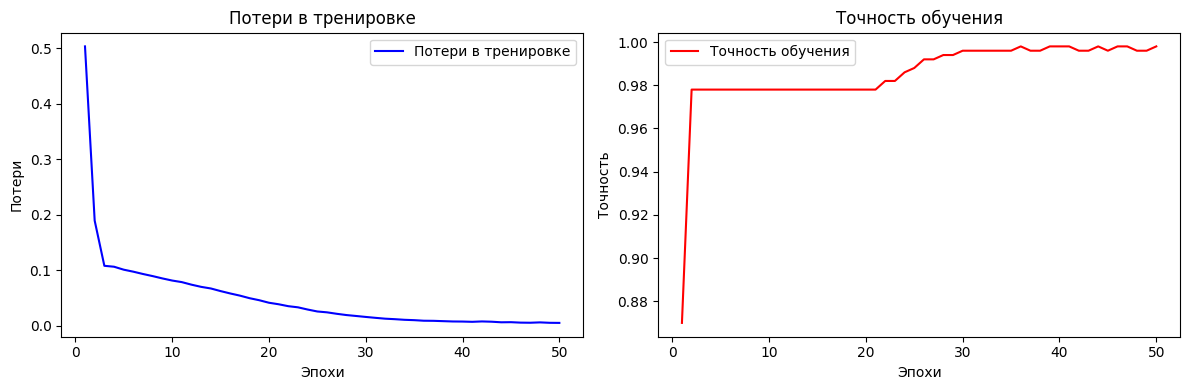

In [ ]:
# Вариант обучения на несбалансированном датасете. Из исходного файла удалены только строки с пустой разметкой
# Предварительно выполнены: Загрузка и предобработка данных
# x_train - входные данные (табличные параметры из резюме)
# y_train - выходные данные (оценка пригодности)

# Создание модели
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(57,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train_02, y_train, epochs=50, batch_size=32)

# Оценка модели
loss, accuracy = model.evaluate(x_train_02, y_train)
print("Потери:", loss)
print("Точность:", accuracy)

# Отрисовка графика истории обучения
plot_training_history(history)


В этом примере последний слой имеет один нейрон и функцию активации сигмоид.

Модель компилируется с оптимизатором 'adam', функцией потерь 'binary_crossentropy' (так как у нас два класса: "да" и "нет") и метрикой точности (accuracy).

Модель обучается на данных x_train и y_train в течение 50 эпох с размером пакета 32. Обученная модель оценивается на тех же данных для вычисления значения потерь и точности.

##### Проверяю предсказания этой модели 

In [ ]:
# Загружаю и готовлю неразмеченные Заказчиком данные для предсказаний
# Загрузка файла.xlsx
data_pr = pd.read_excel('ДатаСет Оценка резюме 581 резюме_пуст.xlsx')

In [ ]:
#Убираю лишние столбцы:
fixed_df_empty = data_pr.drop(data_pr.columns[0],axis = 1)                  # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)     # Убираем первый столбец с датой отклика. Он нам не нужен
fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)    # Убираем первый столбец с ФИО. Он нам не нужен
# Вывод количества резюме и числа оставшихся признаков
print(fixed_df_empty.shape)

(79, 12)


In [ ]:
# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(12):  # Для каждого из столбцов таблицы (их теперь 12)
    for i in range(fixed_df_empty.shape[0]): # По всем резюме
        if type(fixed_df_empty.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\xa0","")
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [ ]:
# Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице

COL_SEX_AGE     = fixed_df_empty.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df_empty.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df_empty.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df_empty.columns.get_loc('Город')
COL_EMPL        = fixed_df_empty.columns.get_loc('Занятость')
COL_SCHED       = fixed_df_empty.columns.get_loc('График')
COL_EXP         = fixed_df_empty.columns.get_loc('Опыт ()')
COL_POS_PREV    = fixed_df_empty.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df_empty.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df_empty.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df_empty.columns.get_loc('Подходит - да/нет')

In [ ]:
# Формирование выборки из загруженного набора данных. Назову ее тестовой
x_test, y_test = construct_train_data(fixed_df_empty.values)

In [ ]:
# Форма наборов параметров и результата
print('x_test.shape:',x_test.shape) 
print('y_test.shape:',y_test.shape)

# Пример обработанных данных
n = 49
print('Пример результата векторизации данных в строке n (x_test[n]):', x_test[n])
print('Пример результата векторизации данных в строке n (y_test[n]):', y_test[n])

x_test.shape: (79, 57)
y_test.shape: (79,)
Пример результата векторизации данных в строке n (x_test[n]): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Пример результата векторизации данных в строке n (y_test[n]): 0


In [ ]:
# Проверка работы сети - предсказание на "тестовой" выборке
pred = model.predict(x_test)
pred

3/3 [==============================] - 0s 3ms/step


array([[2.12720824e-05],
       [1.85650773e-03],
       [1.61198727e-07],
       [1.92362975e-07],
       [1.49134983e-04],
       [2.18812723e-09],
       [1.40164175e-05],
       [1.32989926e-05],
       [8.74244515e-03],
       [1.00696756e-10],
       [1.94952989e-07],
       [3.24908833e-09],
       [1.49374068e-06],
       [1.70566235e-03],
       [5.04284458e-07],
       [2.41207772e-07],
       [6.93518494e-04],
       [9.91067918e-06],
       [7.04799490e-08],
       [2.66512943e-04],
       [1.47731683e-07],
       [1.74427512e-08],
       [2.76442869e-08],
       [1.14188110e-03],
       [1.49371499e-06],
       [9.44359985e-04],
       [3.16483977e-07],
       [1.59392184e-05],
       [1.00891430e-06],
       [4.91379978e-07],
       [1.00696756e-10],
       [8.31365469e-07],
       [1.27475914e-06],
       [1.13798445e-12],
       [5.04284458e-07],
       [2.52370954e-11],
       [6.25796802e-03],
       [7.50249528e-05],
       [6.34214326e-09],
       [1.19400574e-02],


In [ ]:
# Для удобочитаемости: 
predictions = pred.flatten()  # Преобразование в одномерный массив
predictions = [1 if p >= 0.5 else 0 for p in predictions]  # Преобразование вероятностей в метки "да" (1) или "нет" (0)

print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Все предсказания отрицательные. 
ГИПОТЕЗА: при соотношении разметок 11/480+ разметок, модель обучилась соответстенно. Вероятно, если ДС будет сбалансированным, доля полложительных предсказаний будет примерно такой же.

Попробую вариант обучения этой же модели но на сбалансированном датасете в 23 строки

Epoch 1/50
1/1 [==============================] - 1s 763ms/step - loss: 0.6820 - accuracy: 0.4783
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.6670 - accuracy: 0.5652
Epoch 3/50
1/1 [==============================] - 0s 15ms/step - loss: 0.6524 - accuracy: 0.6522
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 0.6384 - accuracy: 0.6522
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6250 - accuracy: 0.7391
Epoch 6/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6122 - accuracy: 0.7391
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 0.5993 - accuracy: 0.7826
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5865 - accuracy: 0.8261
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5742 - accuracy: 0.8261
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5620 - accuracy: 0.8261
Epoch 11/50
1/1 [===========

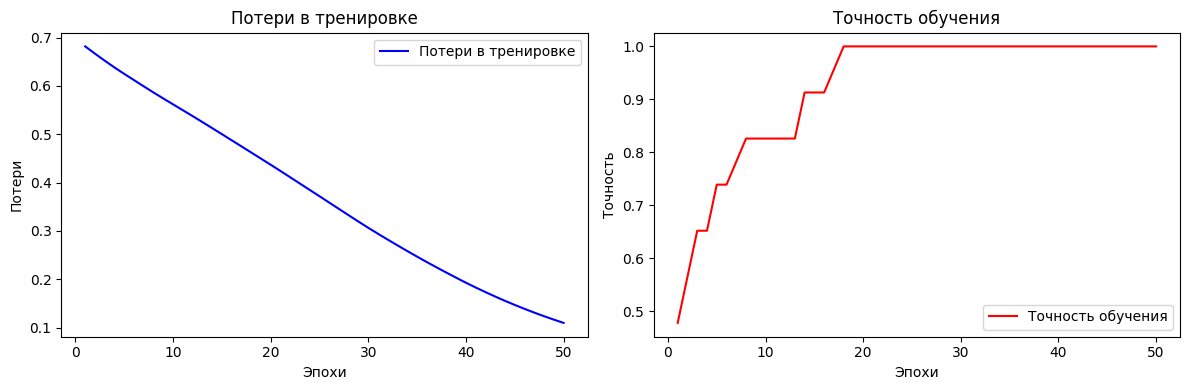

In [48]:
# Вариант обучения на сбалансированном датасете. Из исходного файла удалены все пустые разметки и разметки с "нет", кроме 12 случайных
# вариантов. Строки перемешаны с "да"


# Создание модели
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(57,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train_02, y_train, epochs=50, batch_size=32)

# Оценка модели
loss, accuracy = model.evaluate(x_train_02, y_train)
print("Потери:", loss)
print("Точность:", accuracy)

# Отрисовка графика истории обучения
plot_training_history(history)

##### Проверяю предсказание этой модели 

In [49]:
# Загружаю и готовлю неразмеченные Заказчиком данные для предсказаний
# Загрузка файла.xlsx
data_pr = pd.read_excel('ДатаСет Оценка резюме 581 резюме_пуст.xlsx')

In [50]:
#Убираю лишние столбцы:
fixed_df_empty = data_pr.drop(data_pr.columns[0],axis = 1)                  # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)     # Убираем первый столбец с датой отклика. Он нам не нужен
fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)    # Убираем первый столбец с ФИО. Он нам не нужен
# Вывод количества резюме и числа оставшихся признаков
print(fixed_df_empty.shape)

(79, 12)


In [51]:
# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(12):  # Для каждого из столбцов таблицы (их теперь 12)
    for i in range(fixed_df_empty.shape[0]): # По всем резюме
        if type(fixed_df_empty.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\xa0","")
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [52]:
# Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице

COL_SEX_AGE     = fixed_df_empty.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df_empty.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df_empty.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df_empty.columns.get_loc('Город')
COL_EMPL        = fixed_df_empty.columns.get_loc('Занятость')
COL_SCHED       = fixed_df_empty.columns.get_loc('График')
COL_EXP         = fixed_df_empty.columns.get_loc('Опыт ()')
COL_POS_PREV    = fixed_df_empty.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df_empty.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df_empty.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df_empty.columns.get_loc('Подходит - да/нет')

In [53]:
# Формирование выборки из загруженного набора данных. Назову ее тестовой
x_test, y_test = construct_train_data(fixed_df_empty.values)

In [54]:
# Форма наборов параметров и результата
print('x_test.shape:',x_test.shape) 
print('y_test.shape:',y_test.shape)

# Пример обработанных данных
n = 49
print('Пример результата векторизации данных в строке n (x_test[n]):', x_test[n])
print('Пример результата векторизации данных в строке n (y_test[n]):', y_test[n])

x_test.shape: (79, 57)
y_test.shape: (79,)
Пример результата векторизации данных в строке n (x_test[n]): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Пример результата векторизации данных в строке n (y_test[n]): 0


In [55]:
# Проверка работы сети - предсказание на тренировочной выборке
pred = model.predict(x_test)
pred

3/3 [==============================] - 0s 2ms/step


array([[0.14307588],
       [0.45040065],
       [0.18686163],
       [0.2573557 ],
       [0.27821308],
       [0.7987393 ],
       [0.67560554],
       [0.77960324],
       [0.6953998 ],
       [0.30022457],
       [0.15994328],
       [0.5690457 ],
       [0.0935009 ],
       [0.76892126],
       [0.70634425],
       [0.12871644],
       [0.4574234 ],
       [0.37758583],
       [0.94354355],
       [0.8278892 ],
       [0.2710864 ],
       [0.79164225],
       [0.9506253 ],
       [0.91555536],
       [0.733276  ],
       [0.28618997],
       [0.3808556 ],
       [0.36988285],
       [0.8427662 ],
       [0.86473423],
       [0.3002246 ],
       [0.17002717],
       [0.9022715 ],
       [0.33486885],
       [0.70634425],
       [0.8024432 ],
       [0.86194426],
       [0.30759457],
       [0.09104033],
       [0.58099926],
       [0.45873618],
       [0.4065419 ],
       [0.4106591 ],
       [0.55802906],
       [0.0293163 ],
       [0.04407646],
       [0.26202345],
       [0.255

In [56]:
# Для удобочитаемости: 
predictions = pred.flatten()  # Преобразование в одномерный массив
predictions = [1 if p >= 0.5 else 0 for p in predictions]  # Преобразование вероятностей в метки "да" (1) или "нет" (0)

print(predictions)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]


In [57]:
sum(predictions)

38

##### Результаты/выводы

Получено чуть меньше половины положительных ответов. Соотношение = доли положительных ответов в датасете

ГИПОТЕЗА: На сбалансированном ДС НС дает пропорционально сбалансированные результаты предсказаний.

### Не адаптированные модели 

#### Вариант 2 (предложен ChatGPT)

Для задачи регрессии по описанному датасету с табличными данными из резюме кандидатов, можно рассмотреть использование следующей модели нейронной сети:
Модель: Многослойный перцептрон (Multilayer Perceptron, MLP)
Многослойный перцептрон (MLP) является одним из базовых типов нейронных сетей. Он состоит из нескольких слоев нейронов, включая входной слой, скрытые слои и выходной слой. Каждый нейрон в слоях связан с нейронами в следующем слое и обрабатывает входные данные с помощью активационной функции.
Пример кода для создания модели MLP с использованием библиотеки Keras:


In [59]:
#  Вариант предложенный Chat GPT:


# Определение модели MLP
model = Sequential()
model.add(Dense(64, input_dim=57, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Компиляция модели
model.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
model.fit(x_train_02, y_train, epochs=100, batch_size=32)

# Оценка модели
mse = model.evaluate(x_test, y_test)


Epoch 1/100
1/1 [==============================] - 1s 577ms/step - loss: 0.4379
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3557
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2907
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2415
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2065
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1834
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1697
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1619
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1567
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1513
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1438
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1333
Epoch 13/100
1/1 [==============================] - 0s 5ms/

В этом примере модель состоит из трех слоев: входного слоя с 10 нейронами, двух скрытых слоев с 64 нейронами каждый и выходного слоя с одним нейроном. В качестве функции активации используется ReLU для скрытых слоев и линейная функция активации для выходного слоя.
Модель компилируется с использованием функции потерь "mean_squared_error" (средняя квадратичная ошибка) и оптимизатора "adam". Затем модель обучается на тренировочных данных с заданным количеством эпох и размером пакета.
В конце модель оценивается на тестовых данных, и среднеквадратичная ошибка (MSE) используется для оценки производительности модели.
Вы можете настроить параметры модели, такие как количество скрытых слоев, количество нейронов в каждом слое, функции активации и оптимизатор, чтобы достичь оптимальных результатов в вашей конкретной задаче.


#### Вариант 3 с обчающего ноутбука от Кузина С.

##### Нейронка по простым данным

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=964

In [ ]:
# Обучаем модель полученными данными
model = Sequential()
model.add(BatchNormalization(input_shape=(xTrain01.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(xTrain01, 
                    yTrain, 
                    epochs=50, 
                    batch_size=32,
                    validation_split=0.15, 
                    verbose=2)

plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
# Делаем предсказание и приводим его к начальному виду
pred = model.predict(xTrain01)
pred = pred.flatten()
# Среднее значение ошибки 
delta = pred - yTrain
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

In [ ]:
# В качестве нормализации данных используем готовую библиотеку 
yScaler = StandardScaler()

# Скармливаем объекту двумерный вектор
yScaler.fit(yTrain.reshape(-1, 1))

# Нормализуем по нормальному распределению
yTrainScaled = yScaler.transform(yTrain.reshape(-1, 1))

print(yTrainScaled.shape)
print(yTrain[1])
print(yTrainScaled[1])

In [ ]:
print(min(yTrain), max(yTrain))
print(min(yTrainScaled), max(yTrainScaled))

In [ ]:
# Обучаем модель стандартизированными данными
modelS = Sequential()
modelS.add(BatchNormalization(input_shape=(xTrain01.shape[1],)))
modelS.add(Dense(128, activation='relu'))
modelS.add(Dense(1000, activation='tanh'))
modelS.add(Dense(100, activation='relu'))
modelS.add(Dense(1, activation='linear'))

modelS.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = modelS.fit(xTrain01, 
                    yTrainScaled, 
                    epochs=50, 
                    batch_size=64,
                    validation_split=0.15, 
                    verbose=2)

plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
# Делаем предсказание и приводим его к начальному виду
pred = modelS.predict(xTrain01)
predUnscaled = yScaler.inverse_transform(pred).flatten()

# Среднее значение ошибки 
delta = predUnscaled - yTrain
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

##### Оценка результатов

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=1314



In [ ]:
yy = model.predict(xTrain01) # Результат для всего тренировочного набора

In [ ]:
n = 10
for i in range(n):
  print('Реальное значение - ',yTrain[i], " Предсказанное значение - ", yy[i][0], " Разница - ", abs(yTrain[i]-yy[i][0]))

## План подготовки данных

Примерный план подготовительных шагов в подготовке данных для обучения модели:

1. Задать понятные названия столбцам для использования в коде без индексов.

2. Предобработка данных: Проверить данные на наличие пропущенных значений и выбросов. Может потребоваться заполнить пропущенные значения или удалить аномальные данные. Также может потребоваться выполнить масштабирование или нормализацию признаков, чтобы обеспечить стабильность обучения модели.

3. Разделение на тренировочный и тестовый наборы. Обычно используется отношение 80/20 или 70/30. 

4. Кодирование целевой переменной: Поскольку целевая переменная ("подходит" или "не подходит") представлена в виде текстовых меток, потребуется кодирование для преобразования ее в числовой формат. Например, можно присвоить числу 1 для "подходит" и числу 0 для "не подходит".

5. Обработка дисбаланса классов: Исходная БД очень несбалансирована. Возможно, боевая будет получше. Если нет, потребуется изучить и, возможно,  применить методы балансировки классов, такие как взвешивание классов или аугментация текстовых/табличных данных, чтобы предотвратить смещение модели в сторону преобладающего класса. 

6. Гиперпараметры и кросс-валидация: Нужно определить оптимальные значения гиперпараметров модели, такие как количество нейронов, количество слоев, скорость обучения и другие. Нужно изучить и попробовать использовать методы кросс-валидации для оценки производительности модели на различных подмножествах данных и выбора лучших параметров.

7. Проверка настройки модели в соответствии с требованиями к точности предсказаний и обработанными данными перед началом обучения на обещанных боевых данных от Заказчика.

8. Сборка фрейма предобработки данных от Заказчика для подачи на обучение модели и для дообучения на новых данных, поступающих от заказчика в будущем